$$\lambda_p=S+A_1p+A_2p^2+A_3p^3$$

In [300]:
import math
import numpy as np
from lmfit import models
from scipy.optimize import fsolve
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [301]:
lamda_p=[585.25, 609.62, 639.23, 650.23]
lamda_p = np.array(lamda_p)
lamda_p_error=[0.1,2,3,1]
lamda_p_error = np.array(lamda_p_error)
lamda_p_weight = 1/(np.array(lamda_p_error))
p=[1768.370887,2217.282097,2776.418613,2986.168976]
p=np.array(p)
p_error=[56.09028419699995, 20.79817753199994, 26.778450233999898, 18.047039645999696]
p_error = np.array(p_error)
p_weight =1/(np.array(p_error))

In [302]:
df = pd.DataFrame({'lamda_p': lamda_p,
                    'lamda_weight':lamda_p_weight,
                    'p':p,
                    'p_weight':p_weight})
df

,lamda_p,lamda_weight,p,p_weight
0,585.25,10.000000,1768.370887,0.017828
1,609.62,0.500000,2217.282097,0.048081
2,639.23,0.333333,2776.418613,0.037343
3,650.23,1.000000,2986.168976,0.055411


Text(0, 0.5, 'golflengte (nm)')

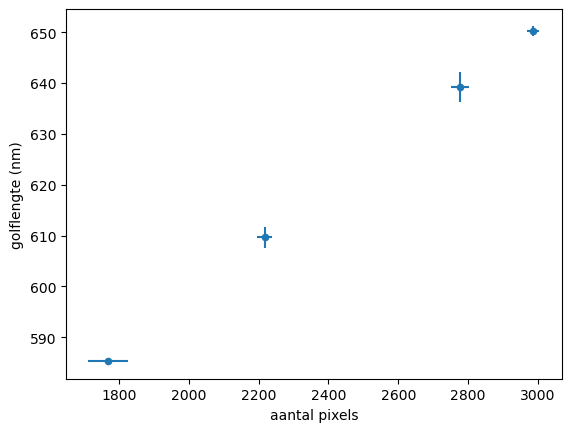

In [303]:
ax = df.plot.scatter('p','lamda_p',xerr=p_error,yerr=lamda_p_error)

# Set axis labels
ax.set_xlabel('aantal pixels')
ax.set_ylabel('golflengte (nm)')

# Set axis view limits
# ax.set_xlim(1500, 3000)
# ax.set_ylim(0, 700)

In [304]:
def formule(p,S,A_1,A_2,A_3):
    return A_1 *p + A_2*p**2 +A_3*p**3 +S 
curve_model= models.Model(formule)


In [305]:
fit_result=curve_model.fit(df['lamda_p'],p=df['p'],weights=df['p_weight'],S=230,A_1=0.4,A_2=0.0001,A_3=0.000000001)

In [306]:
fit_result

Text(0.5, 1.0, '')

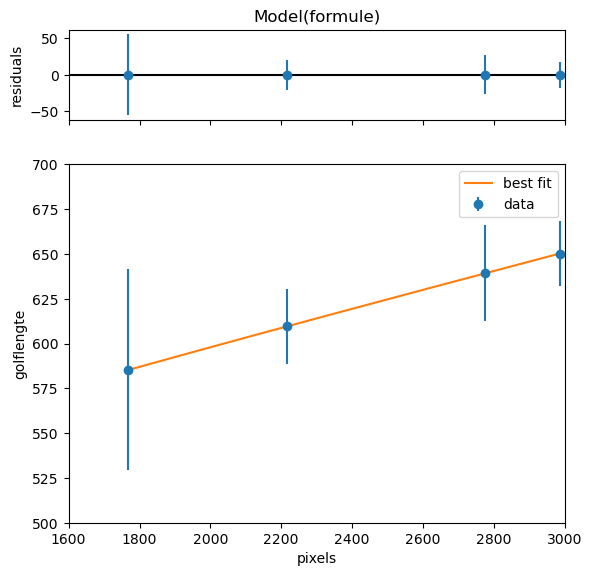

In [307]:
# plot fit including residuals
fit_result.plot(numpoints=1000)

# Set axis labels
plt.xlabel('pixels')
plt.ylabel('golflengte')

# Set axis view limits
plt.xlim(1600, 3000)
plt.ylim(500, 700)

# Remove title
plt.title(None)
